In [23]:
import mne
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mne.time_frequency import tfr_morlet, tfr_array_morlet
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import BettiCurve, PersistenceEntropy, Amplitude

import argparse

# Define parameters
epoch_length = 5  # in seconds
overlap = 4  # in seconds (1 ms)
# time between the start of consecutive epochs
event_interval = epoch_length - overlap
# Generate fake events
sfreq = 256  # sampling frequency
event_duration = int(sfreq * epoch_length)  # number of samples in an epoch
# number of samples between consecutive events
event_step = int(sfreq * event_interval)
n_events = int((153344 - event_duration) / event_step) + 1
events = np.array([[int(i * event_step), 0, 1] for i in range(n_events)])
frequencies = np.arange(8, 30, 1)  # Frequencies of interest from 8 to 30 Hz
n_cycles = frequencies / 2.  # Number of cycles in Morlet wavelet
groupName = ['HTR','CTR','VIP','SNY']
groups = ['0','1','2','3']
data_dir = pathlib.Path(f"./data/raw/med2/")
rawPath = []
files = list(data_dir.glob(f"*{groups[3]}_raw.fif"))
rawPath = sorted(files)
rawPath = rawPath[:10]

In [24]:
rawPath

[PosixPath('data/raw/med2/file0_3_raw.fif'),
 PosixPath('data/raw/med2/file10_3_raw.fif'),
 PosixPath('data/raw/med2/file11_3_raw.fif'),
 PosixPath('data/raw/med2/file12_3_raw.fif'),
 PosixPath('data/raw/med2/file13_3_raw.fif'),
 PosixPath('data/raw/med2/file14_3_raw.fif'),
 PosixPath('data/raw/med2/file15_3_raw.fif'),
 PosixPath('data/raw/med2/file17_3_raw.fif'),
 PosixPath('data/raw/med2/file1_3_raw.fif'),
 PosixPath('data/raw/med2/file2_3_raw.fif')]

Opening raw data file data/raw/med2/file0_3_raw.fif...
Isotrak not found
    Range : 0 ... 153343 =      0.000 ...   598.996 secs
Ready.
Reading 0 ... 153343  =      0.000 ...   598.996 secs...


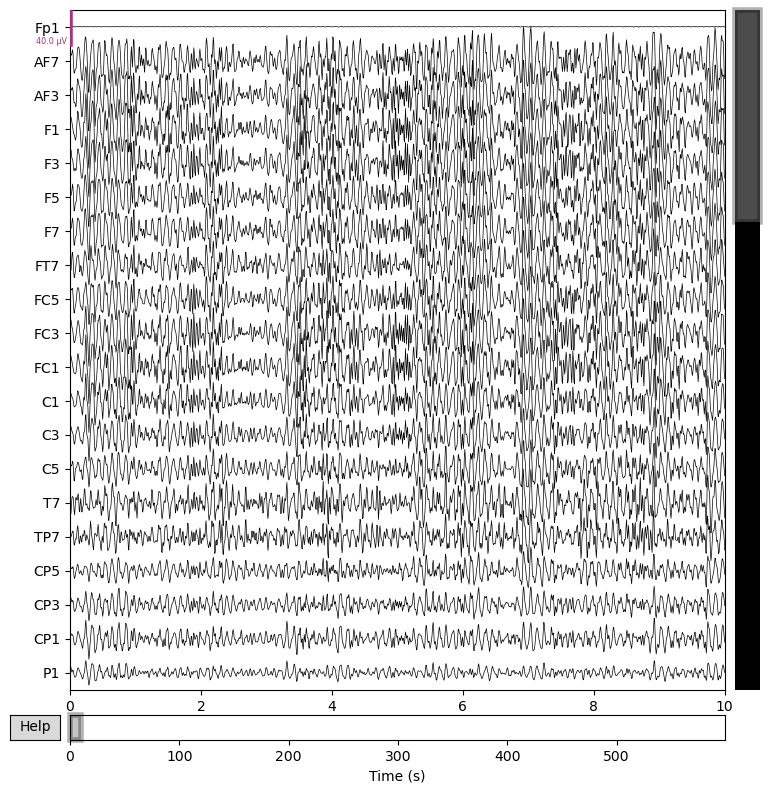

Opening raw data file data/raw/med2/file10_3_raw.fif...
Isotrak not found
    Range : 0 ... 153343 =      0.000 ...   598.996 secs
Ready.
Reading 0 ... 153343  =      0.000 ...   598.996 secs...


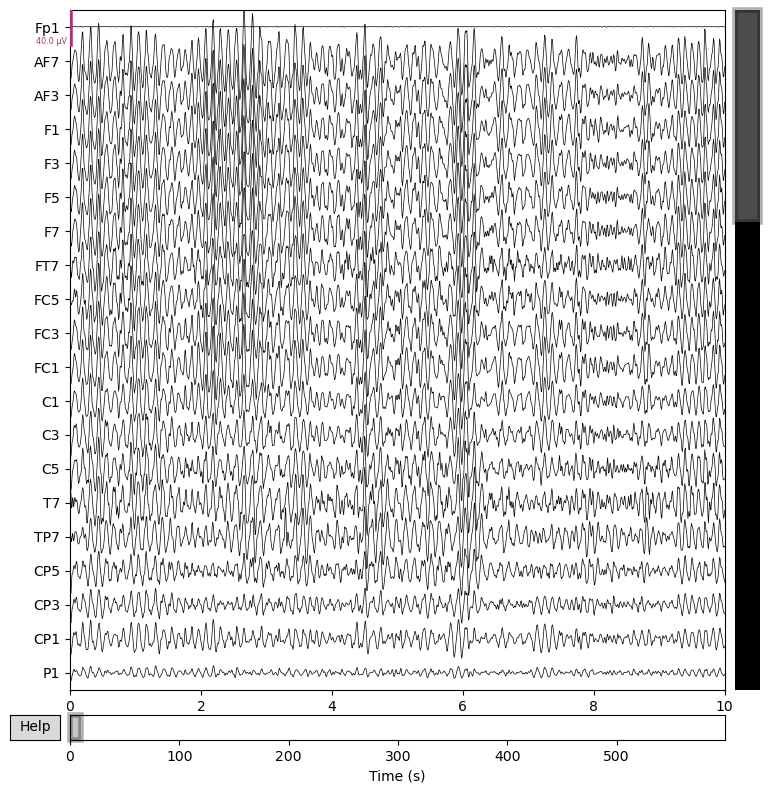

Opening raw data file data/raw/med2/file11_3_raw.fif...
Isotrak not found
    Range : 0 ... 153343 =      0.000 ...   598.996 secs
Ready.
Reading 0 ... 153343  =      0.000 ...   598.996 secs...


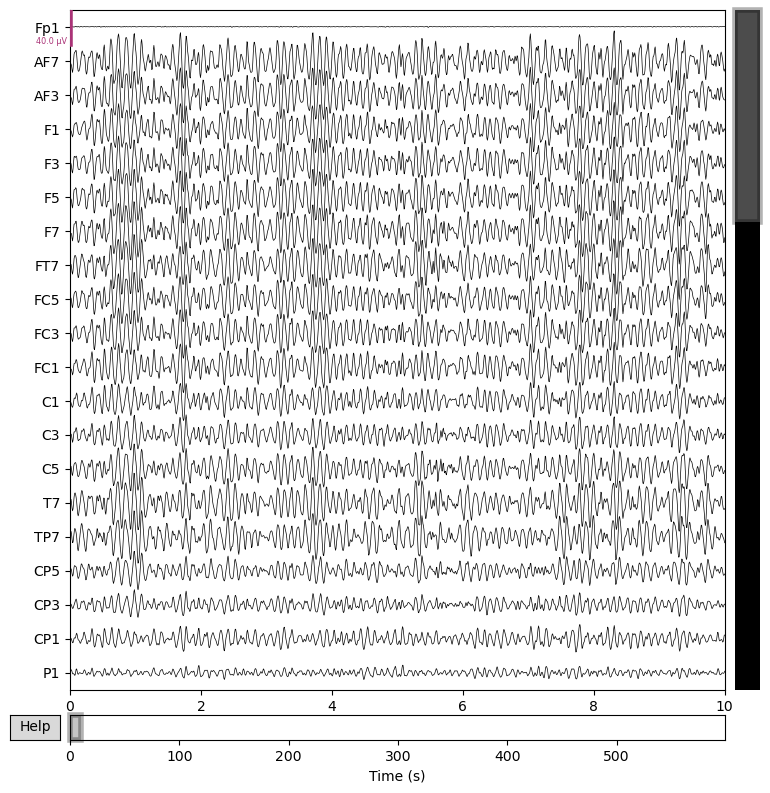

Opening raw data file data/raw/med2/file12_3_raw.fif...
Isotrak not found
    Range : 0 ... 153343 =      0.000 ...   598.996 secs
Ready.
Reading 0 ... 153343  =      0.000 ...   598.996 secs...


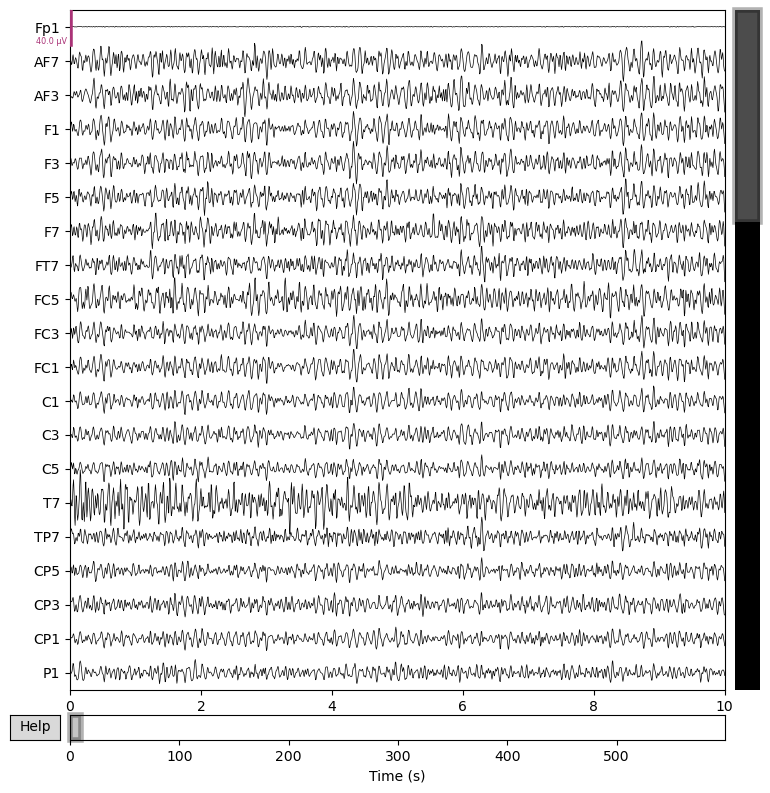

Opening raw data file data/raw/med2/file13_3_raw.fif...
Isotrak not found
    Range : 0 ... 153343 =      0.000 ...   598.996 secs
Ready.
Reading 0 ... 153343  =      0.000 ...   598.996 secs...


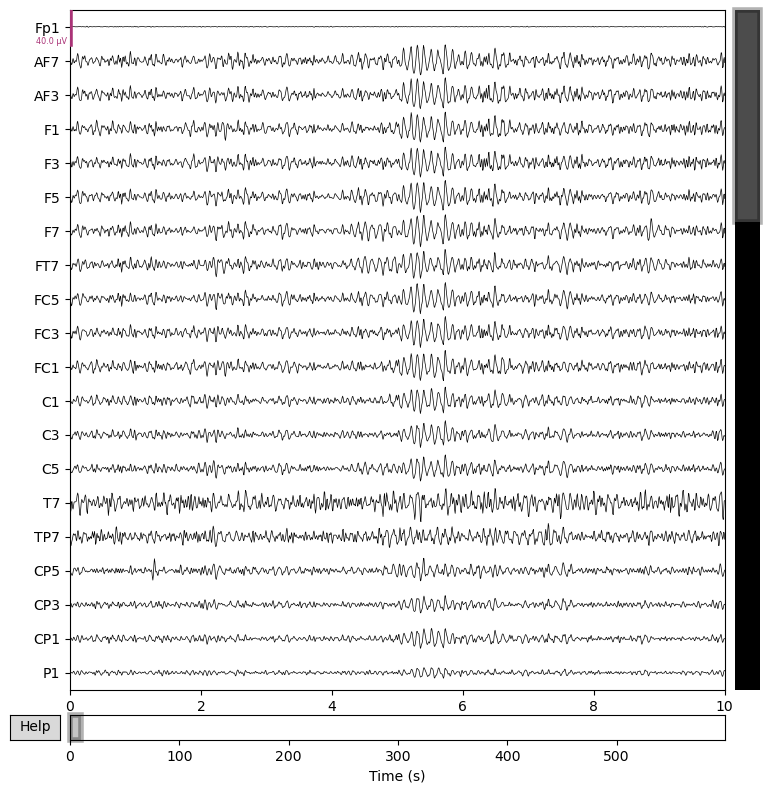

Opening raw data file data/raw/med2/file14_3_raw.fif...
Isotrak not found
    Range : 0 ... 153343 =      0.000 ...   598.996 secs
Ready.
Reading 0 ... 153343  =      0.000 ...   598.996 secs...


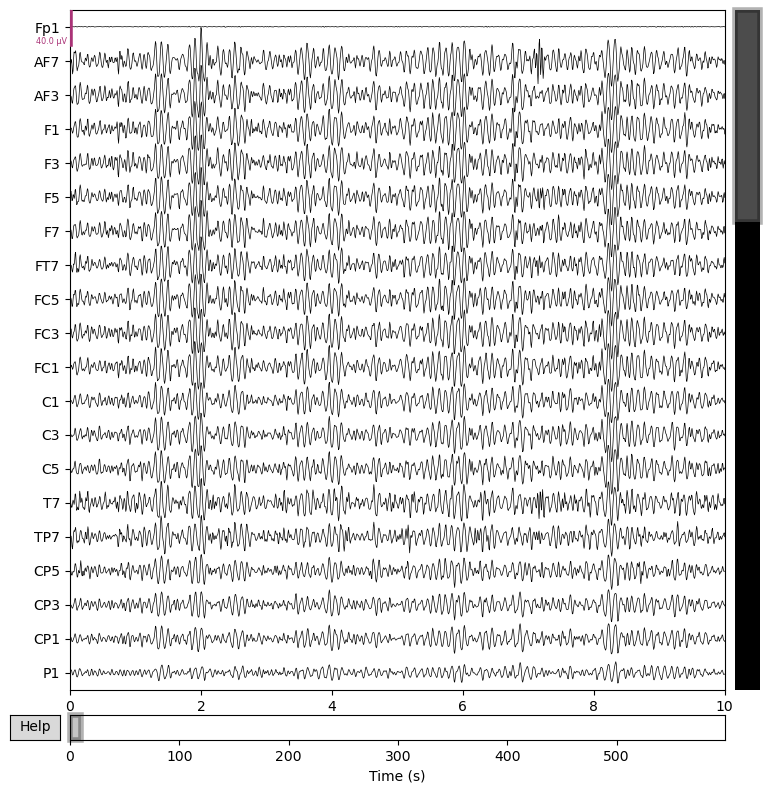

Opening raw data file data/raw/med2/file15_3_raw.fif...
Isotrak not found
    Range : 0 ... 153343 =      0.000 ...   598.996 secs
Ready.
Reading 0 ... 153343  =      0.000 ...   598.996 secs...


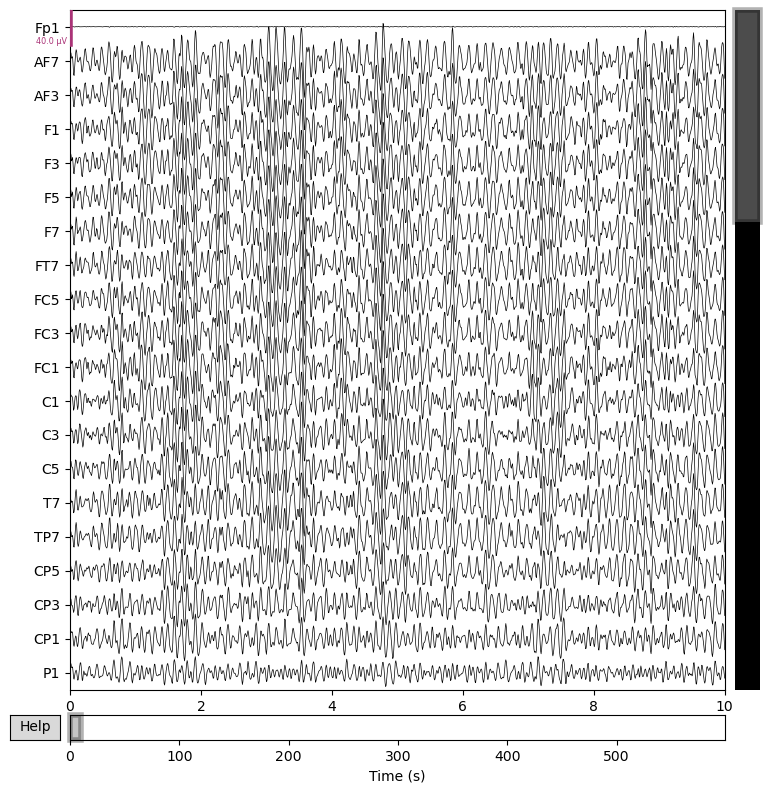

Opening raw data file data/raw/med2/file17_3_raw.fif...
Isotrak not found
    Range : 0 ... 153343 =      0.000 ...   598.996 secs
Ready.
Reading 0 ... 153343  =      0.000 ...   598.996 secs...


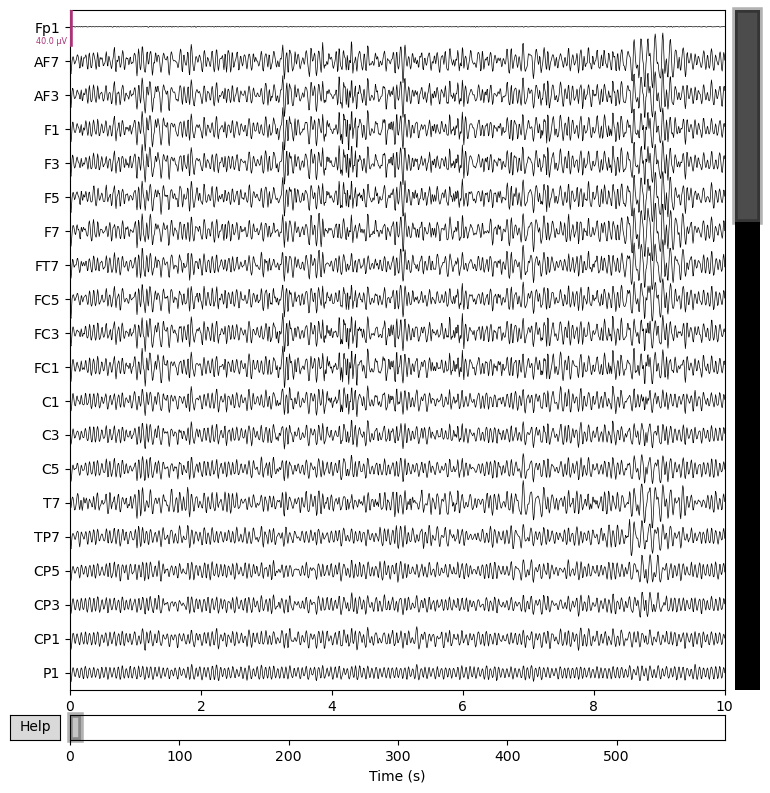

Opening raw data file data/raw/med2/file1_3_raw.fif...
Isotrak not found
    Range : 0 ... 153343 =      0.000 ...   598.996 secs
Ready.
Reading 0 ... 153343  =      0.000 ...   598.996 secs...


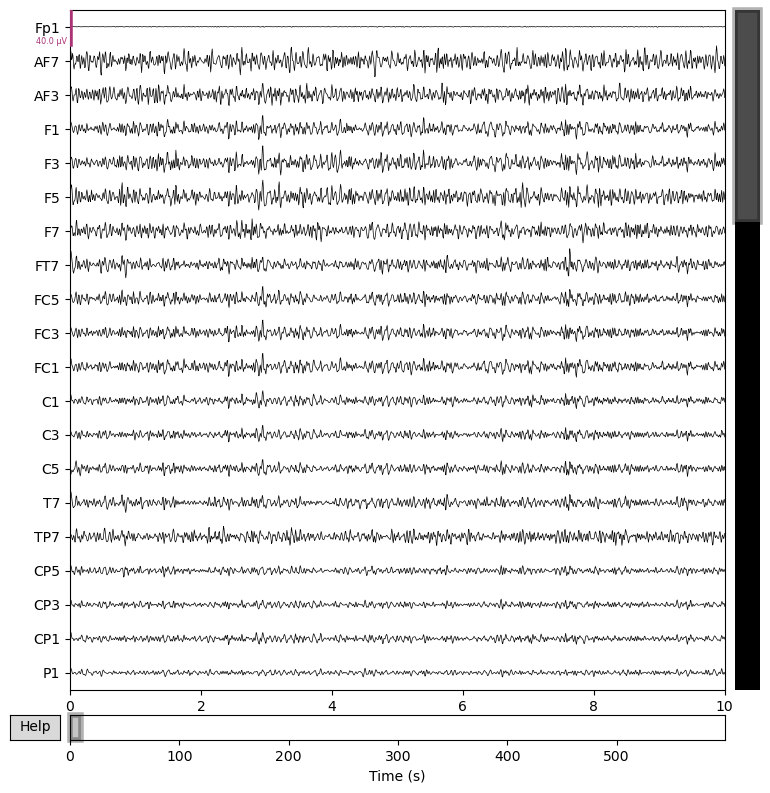

Opening raw data file data/raw/med2/file2_3_raw.fif...
Isotrak not found
    Range : 0 ... 153343 =      0.000 ...   598.996 secs
Ready.
Reading 0 ... 153343  =      0.000 ...   598.996 secs...


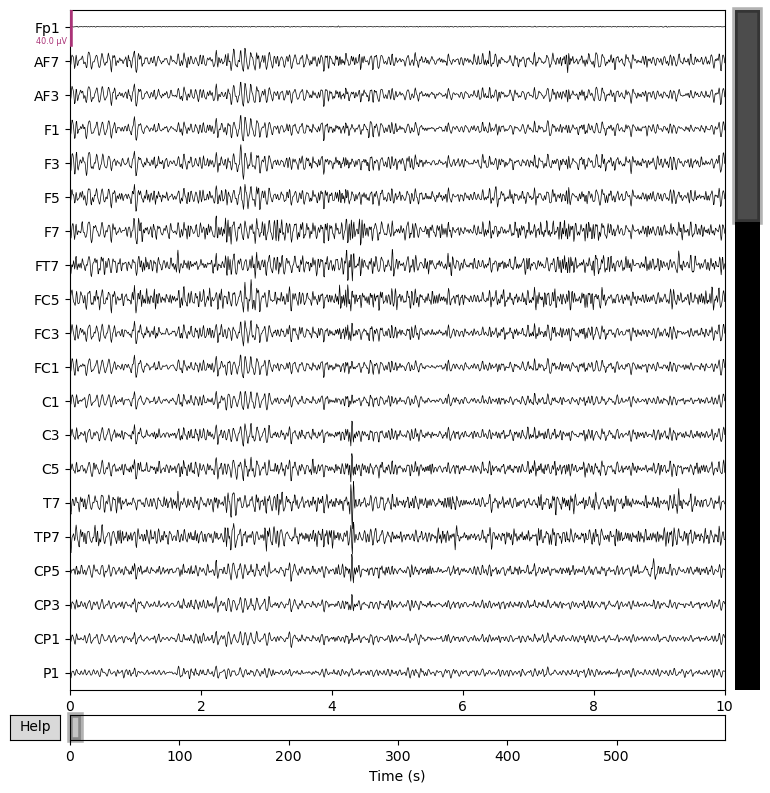

In [25]:
for raw in rawPath:
    mne.io.read_raw_fif(raw, preload=True).plot()
    